In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FormatStrFormatter
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
df = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
#null=df.isnull().sum()
#null.sort_values(ascending = False)

In [23]:
numeric = df._get_numeric_data
num_cols = df._get_numeric_data().columns
num_cols

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [4]:
df= pd.get_dummies(df,columns =['Overall Qual'])


In [6]:
test = pd.get_dummies(test,columns =['Overall Qual'])

In [7]:
df['Total Bsmt SF'].fillna(0,inplace = True)
test['Total Bsmt SF'].fillna(0,inplace = True)

In [8]:
target = df['SalePrice']

In [11]:
predictor_corr = df.corrwith(target)
predictor_corr.sort_values(ascending = False)

SalePrice          1.000000
Gr Liv Area        0.697038
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.629303
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
Overall Qual_9     0.470399
BsmtFin SF 1       0.423519
Overall Qual_8     0.423016
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Overall Qual_10    0.317078
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Overall Qual_7     0.142950
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016255
Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0

In [9]:
df['Garage Cars'].fillna(0, inplace=True)
df['Garage Area'].fillna(0, inplace=True)
df['Total Bsmt SF'].fillna(0, inplace = True)

In [15]:
df['Garage Yr Blt'].

SyntaxError: invalid syntax (<ipython-input-15-38004b286148>, line 1)

In [10]:
features = ['Year Built','Year Remod/Add', 'Overall Qual_2',
         'Overall Qual_3','Overall Qual_4','Overall Qual_5',
         'Overall Qual_6','Overall Qual_7','Overall Qual_8',
         'Overall Qual_9','Overall Qual_10','Gr Liv Area'
         ,'Total Bsmt SF','Garage Area','1st Flr SF', 'Full Bath','Fireplaces','TotRms AbvGrd']

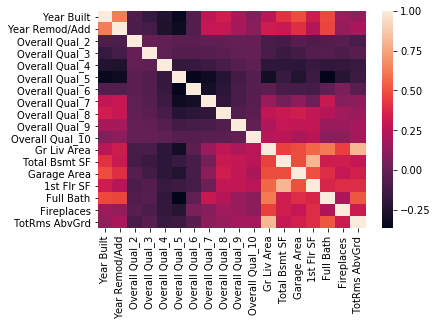

In [11]:
sns.heatmap(df[features].corr())

In [13]:
X_test = test[features]

In [14]:
lm = linear_model.LinearRegression()
target = df['SalePrice']

X = df[features]
y = target


model = lm.fit(X,y)

predictions  =  model.predict(X_test)
score        =  model.score(X, y)
betacoef     =  model.coef_

In [15]:
score

0.8352790179874754

In [16]:
test['SalePrice'] = predictions

In [22]:
pd.DataFrame(test['SalePrice'], index = test['Id'])

,SalePrice
Id,
2658,NaN
2718,NaN
2414,NaN
1989,NaN
625,135532.869059
333,145188.314813
1327,NaN
858,101645.755846
95,124422.602990


In [23]:
#submit.to_csv('submission.csv')

In [24]:
##OVERFIT TEST

from sklearn.preprocessing import PolynomialFeatures
X = df[features]
pf = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
pf = pf.fit(X)
Xoverfit = pf.transform(X)
Xoverfit.shape

(2051, 171)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
X = test[features]
pf = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
pf = pf.fit(X_test)
Xoverfit_test = pf.transform(X)
Xoverfit_test.shape

(879, 171)

In [26]:
X_test.shape

(879, 18)

In [27]:
lm = linear_model.LinearRegression()
target = df['SalePrice']
y = target
model = lm.fit(Xoverfit,y)

predictions_overfit  =  model.predict(Xoverfit_test)
score_overfit      =  model.score(Xoverfit, y)
betacoef_overfit     =  model.coef_

In [28]:
mse = mean_squared_error(y,predictions_overfit)
print('RMSE:',np.sqrt(mse))
print('R2:',score_overfit)

ValueError: Found input variables with inconsistent numbers of samples: [2051, 879]

In [29]:
score_overfit

0.9122260095855894

In [ ]:
## Normalizing Predicitors

In [79]:
len(predictions_overfit)

879

In [31]:
submit = test[['Id','SalePrice']]

In [32]:
submit

,Id,SalePrice
0,2658,142287.906525
1,2718,195135.203435
2,2414,197054.121246
3,1989,124481.492097
4,625,180469.711476
5,333,107714.473106
6,1327,125028.310718
7,858,145124.879437
8,95,201807.902169
9,1568,180257.645997


In [86]:
submit.to_csv('Submission_2.csv')

In [73]:

pd.DataFrame(test['SalePrice'],index = test['Id'])

,SalePrice
Id,
2658,NaN
2718,NaN
2414,NaN
1989,NaN
625,139437.784129
333,139767.778269
1327,NaN
858,92097.627879
95,125787.905222


In [ ]:
print(r2_score(y,predictions))
print(mean_squared_error(y,predictions))

In [12]:
lr_model = LinearRegression()
lr_cv_mean_mse = -cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
lr_cv_mean_r2 = cross_val_score(lr_model, X, y, cv=5, scoring='r2').mean()
lr_cv_mean_mse, lr_cv_mean_r2

NameError: name 'X' is not defined

In [37]:
from sklearn.linear_model import Lasso, LassoCV

In [51]:
l_alphas = np.logspace(0,4,30)
lasso_model = LassoCV(alphas=l_alphas, cv=5,)
lasso_model = lasso_model.fit(X, y)

C:\Users\tbaca\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\tbaca\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\tbaca\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\tbaca\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

In [52]:
lasso_optimal_alpha = lasso_model.alpha_
lasso_optimal_alpha

4.893900918477494

In [40]:
lasso_model = Lasso(alpha=lasso_optimal_alpha)

In [41]:
lasso_model.fit(X,y)

C:\Users\tbaca\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.49985, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
lasso_mse = -cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error').mean()

C:\Users\tbaca\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\tbaca\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\tbaca\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\tbaca\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

In [43]:
np.sqrt(lasso_mse)

34047.640861852466